# Day 3: No Matter How You Slice It

## Parse input

In [1]:
import re
import itertools

class Slice:
    def __init__(self, index, x, y, width, height):
        self.index = int(index)
        self.x = int(x)
        self.y = int(y)
        self.width = int(width)
        self.height = int(height)
    def iterAllPoints(self):
        return itertools.product(range(self.x, self.x + self.width), range(self.y, self.y + self.height))
    def getMaxX(self):
        return self.x + self.width
    def getMaxY(self):
        return self.y + self.height
        
# Input format: #1 @ 520,746: 4x20
inputregex = re.compile('#(\d+) @ (\d+),(\d+): (\d+)x(\d+)')

# Parse input file and convert to ints.
# Resulting tuples: (index, x, y, width, height)
with open('inputs/3.txt') as f:
    input = f.readlines()
processedInput = [tuple(map(int, inputregex.findall(s)[0])) for s in input]

# Convert processed input to slice objects
slices = [Slice(i[0], i[1], i[2], i[3], i[4]) for i in processedInput]

## Find answer #1

In [2]:
# Calculate required grid size
gridWidth = max([sl.getMaxX() for sl in slices])
gridHeight = max([sl.getMaxY() for sl in slices])
grid = [[0] * gridHeight for i in range(gridWidth)]

answer1 = 0

for sl in slices:
    for x, y in sl.iterAllPoints():
        if (grid[x][y] == 1): # Only count the FIRST double claim
            answer1 += 1
        # This spot is now claimed
        grid[x][y] += 1
        
answer1

120419

## Find answer #2

In [3]:
answer2 = None

for sl in slices:
    hasOverlap = False
    for x, y in sl.iterAllPoints():
        if (grid[x][y] > 1):
            hasOverlap = True
            break
    if not hasOverlap:
        answer2 = sl.index
        break
        
answer2

445

## Visualisation

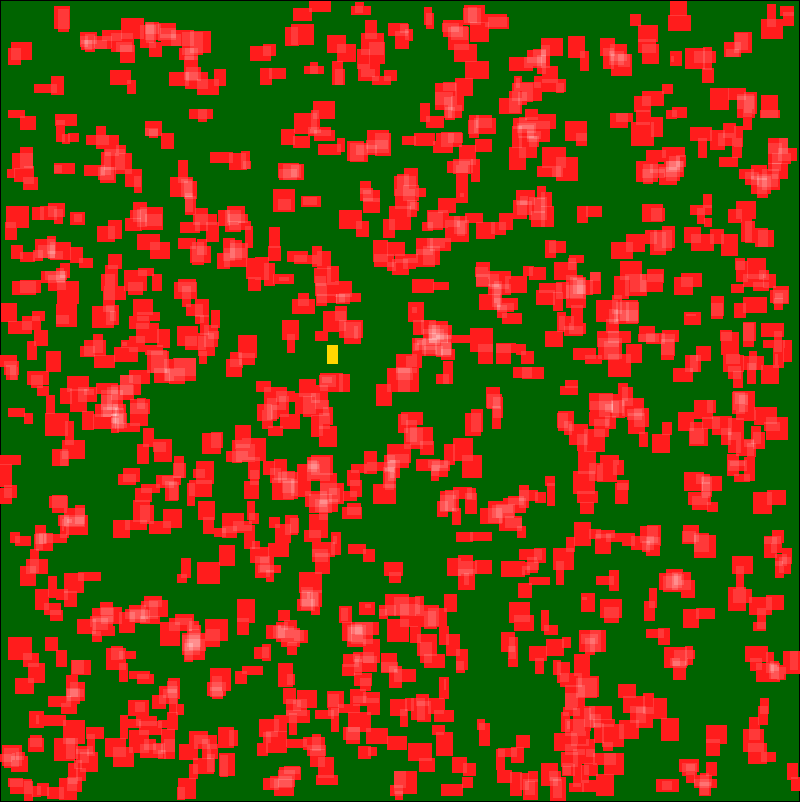

In [7]:
from PIL import Image, ImageColor, ImageDraw
from IPython.display import display
import math

visWidth = 800
visScale = visWidth / gridWidth
visHeight = math.ceil(gridHeight * visScale)
colorScale = 200 / max([max(x) for x in grid])

im = Image.new('RGB', (visWidth, visHeight), ImageColor.getcolor('darkgreen', 'RGB'))
# Draw black outline
draw = ImageDraw.Draw(im)
draw.rectangle([0, 0, visWidth - 1, visHeight - 1], None, ImageColor.getcolor('black', 'RGB'))

# This is a bit slow..
for sl in slices:
    for x, y in sl.iterAllPoints():
        if sl.index == answer2:
            color = ImageColor.getcolor('gold', 'RGB')
        else:
            color = (255, int(grid[x][y] * colorScale), int(grid[x][y] * colorScale))
        im.putpixel((int(x * visScale), int(y * visScale)), color)

display(im)